# Intro data science - portfolio assignment 12: Bivariate analysis 2 Heart disease

30 min: Perform a bivariate analysis on at least 3 combinations of a numerical column with a categorical column in the dataset that you chose in portfolio assignment 4. Use groupby("").mean() to calculate the means. Is there a difference between categogires? Then use seaborn barplots to check if there is a statistically significant difference.

In [61]:
import pandas as pd
import seaborn as sns

In [62]:
heart = pd.read_csv('datasets/heart.csv')

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Attributes:

- age
- sex
- cp: chest pain type (4 values)
- trestbps: resting blood pressure
- chol: serum cholesterol in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [63]:
heart.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.849359,1.006410,133.701923,261.455128,0.134615,0.573718,150.830128,0.237179,0.921154,1.410256,0.580128,2.137821,0.724359
1,53.814867,0.914446,130.697055,239.237027,0.155680,0.510519,148.363254,0.380084,1.137307,1.374474,0.830295,2.405330,0.420757


Before making a visualization, we should replace the 0 and 1 values with male and female respectively.

In [64]:
heart = heart.replace({'sex': {0: 'Male', 1: 'Female'}})

In [65]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Female,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Female,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Female,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Female,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Male,0,138,294,1,1,106,0,1.9,1,3,2,0


Better!

Let's look at the cholesterol level by sex.

<AxesSubplot:xlabel='sex', ylabel='chol'>

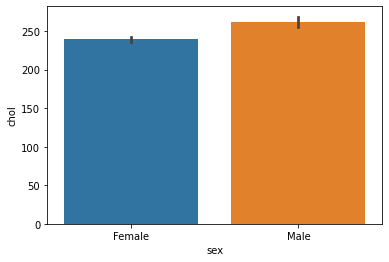

In [66]:
sns.barplot(x='sex', y='chol', data=heart)

Conclusion: Males with heart disease have a higher cholesterol level than females.

## Age groups

For the next few analyses, I want to divide the records into different age group. To do so, let's look at the age range first.

In [67]:
heart['age'].min()

29

In [68]:
heart['age'].max()

77

In this case, I think it would be a good idea to create an age group for every 10 years:

- 20-30
- 30-40
- 40-50
- ...and so on

In [69]:
age_groups = pd.cut(heart['age'], bins=[20, 30, 40, 50, 60, 70, 80], 
                    labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [70]:
age_groups

0       50-60
1       50-60
2       60-70
3       60-70
4       60-70
        ...  
1020    50-60
1021    50-60
1022    40-50
1023    40-50
1024    50-60
Name: age, Length: 1025, dtype: category
Categories (6, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']

Now, we can insert the age groups into the original dataframe.

In [71]:
heart.insert(1, 'age group', age_groups)

In [72]:
heart.head()

,age,age group,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,50-60,Female,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,50-60,Female,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,60-70,Female,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,60-70,Female,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,60-70,Male,0,138,294,1,1,106,0,1.9,1,3,2,0


In [74]:
heart.groupby('age group').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age group,,,,,,,,,,,,,
20-30,29.000000,1.000000,130.000000,204.000000,0.000000,0.000000,202.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000
30-40,37.390625,1.328125,127.093750,211.031250,0.000000,0.796875,166.531250,0.281250,0.887500,1.593750,0.500000,2.406250,0.640625
40-50,45.028340,0.991903,124.080972,236.105263,0.080972,0.582996,157.748988,0.222672,0.652632,1.489879,0.384615,2.210526,0.672065
50-60,55.767123,0.892694,133.317352,248.815068,0.205479,0.513699,147.591324,0.404110,1.146804,1.363014,0.787671,2.363014,0.465753
60-70,64.587302,0.876984,137.634921,260.543651,0.154762,0.436508,139.142857,0.353175,1.454365,1.238095,1.107143,2.376984,0.373016
70-80,73.100000,1.000000,126.150000,243.600000,0.200000,0.650000,135.150000,0.300000,0.575000,1.650000,1.100000,2.000000,0.850000


Let's look at the cholesterol level by age group.

<AxesSubplot:xlabel='chol', ylabel='age group'>

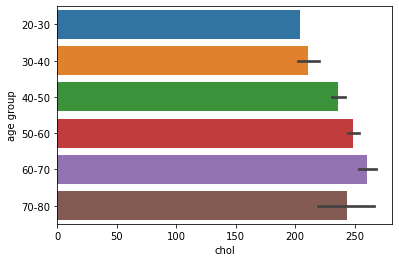

In [77]:
sns.barplot(x='chol', y='age group', data=heart)

Conclusion: It looks like the cholesterol level increases as the patient gets older. According to this plot, the age group 60-70 has the highest average cholesterol level. However, there is a large confidence interval. Why could this be the case?

In [78]:
heart['age group'].value_counts()

50-60    438
60-70    252
40-50    247
30-40     64
70-80     20
20-30      4
Name: age group, dtype: int64

As you can see, this dataset only contains 20 patients between 70 and 80 years old. This causes the confidence interval to be higher, as there is not enough data to make sure that the mean cholesterol level is accurate.